In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import shutil

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False
# 매직명령어 => 쥬피터노트북에서 그래프 삽입 기능 
%matplotlib inline
# 글꼴 선명화 
%config InlineBackend.figure_format = 'retina'

# 랜덤 모듈
import random

# 학습 모델 저장 및 복원
import pickle

# 딥러닝 라이브러리
import tensorflow as tf
# 신경망 모델을 관리하는 객체
from tensorflow.keras.models import Sequential
# 선형 회귀 레이어
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 객체
from tensorflow.keras.layers import Activation
# 원핫 인코딩을 수행하는 함수
from tensorflow.keras.utils import to_categorical

# 저장된 학습모델을 복원한다.
from tensorflow.keras.models import load_model

# 모델을 자동 저장한다.
from tensorflow.keras.callbacks import ModelCheckpoint
# 성능이 더이상 좋아지지 않을 경우 중단 시킨다.
from tensorflow.keras.callbacks import EarlyStopping

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# 문자열 => 숫자
from sklearn.preprocessing import LabelEncoder

# 전체데이터를 학습용과 검증으로 나눈다.
from sklearn.model_selection import train_test_split

# 랜덤시드 설정
# 데이터를 랜덤하게 섞거나 가중치를 랜덤하게 설정하는 등..
# 작업에서 랜덤을 적용하는 경우가 더러 있다.
# 이에, 시드를 고정시킨다.
random_seed = 1
np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# 현재 프로젝트에서 GPU 메모리 사용을 필요한 만큼만 쓸 수 있도록 한다.
# 컴퓨터에 있는 GPU 정보들을 가져온다.

gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면...
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

In [2]:
# 데이터를 읽어온다.
df1 = pd.read_csv('./data/mushrooms.csv')
df1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
len(df1.columns)

23

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df1.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
# 결과 데이터 확인
# 0부터 1씩 증가되는 것이 아니라면 인코딩해주는 것이 좋다.
df1['habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [7]:
columns_list = df1.columns

In [8]:
for a, b in enumerate(df1.columns):
    encoder = LabelEncoder()
    df1[b] = encoder.fit_transform(df1[b])    

In [9]:
X = df1.drop(['habitat'], axis=1)
y = df1['habitat']

In [10]:
# 2진 분류 옵션들
# out_nodes = 1
# loss_function = 'binary_crossentropy'
# activation_function = 'sigmoid'

# 다중 분류 옵션들
# out_nodes = y.shape[1]
# loss_function = 'categorical_crossentropy'
# activation_function = 'softmax'

# 회귀
# 출력 결과를 하나만 뽑아서 Series로 나왔다면...
# 1로 설정한다.
if type(y) is pd.core.series.Series:
    out_nodes = 1
else : 
    out_nodes = y.shape[1]
    
loss_function = 'mean_squared_error'

In [11]:
# 입력노드의 개수
# 입력 데이터 행 하나의 컬럼의 개수
input_size = X.shape[1]
input_size

22

In [12]:
# 신경망 설계
model = Sequential()

model.add(Dense(60, input_dim=input_size))
model.add(Activation('relu'))

model.add(Dense(40))
model.add(Activation('relu'))

model.add(Dense(20))
model.add(Activation('relu'))

# model.add(Dense(10))
# model.add(Activation('relu'))

model.add(Dense(out_nodes))
# model.add(Activation(activation_function))

In [13]:
# 모델 컴파일
model.compile(loss=loss_function, optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                1380      
                                                                 
 activation (Activation)     (None, 60)                0         
                                                                 
 dense_1 (Dense)             (None, 40)                2440      
                                                                 
 activation_1 (Activation)   (None, 40)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                820       
                                                                 
 activation_2 (Activation)   (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 2

In [14]:
# 학습모델을 저장할 경로
path = './model/mushrooms2'

# 만약 폴더가 있다면 삭제한다.
if os.path.isdir(path):
    shutil.rmtree(path)

# 폴더를 생성한다.
os.makedirs(os.path.join(path))

In [15]:
path1 = path + '/{epoch}-{val_loss}.h5'
path2 = path + '/best_model.h5'

# 저장콜백
call1 = ModelCheckpoint(filepath=path1, monitor='val_loss', save_best_only=True)
call2 = ModelCheckpoint(filepath=path2, monitor='val_loss', save_best_onlu=True)

In [16]:
# 조기 중단
call3 = EarlyStopping(monitor='val_loss', patience=300)

In [17]:
# 학습과 검증데이터로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [18]:
# 학습
# validation_split : 주어진 데이터에서 사용할 검증데이터 비율
history = model.fit(X_train, y_train, epochs=200000, batch_size=10000,
                    validation_data=[X_test, y_test], callbacks=[call1, call2, call3])

Epoch 1/200000
1/1 [==============================] - 1s 890ms/step - loss: 6.7687 - val_loss: 6.0391
Epoch 2/200000
1/1 [==============================] - 0s 64ms/step - loss: 5.8645 - val_loss: 5.2858
Epoch 3/200000
1/1 [==============================] - 0s 76ms/step - loss: 5.1381 - val_loss: 4.6733
Epoch 4/200000
1/1 [==============================] - 0s 59ms/step - loss: 4.5564 - val_loss: 4.1814
Epoch 5/200000
1/1 [==============================] - 0s 61ms/step - loss: 4.0876 - val_loss: 3.7967
Epoch 6/200000
1/1 [==============================] - 0s 65ms/step - loss: 3.7188 - val_loss: 3.5129
Epoch 7/200000
1/1 [==============================] - 0s 63ms/step - loss: 3.4476 - val_loss: 3.3018
Epoch 8/200000
1/1 [==============================] - 0s 54ms/step - loss: 3.2483 - val_loss: 3.1395
Epoch 9/200000
1/1 [==============================] - 0s 55ms/step - loss: 3.0996 - val_loss: 3.0257
Epoch 10/200000
1/1 [==============================] - 0s 54ms/step - loss: 3.0002 - val_l

In [19]:
# 리스트를 추출한다.
loss_list = history.history['loss']
val_loss_list = history.history['val_loss']

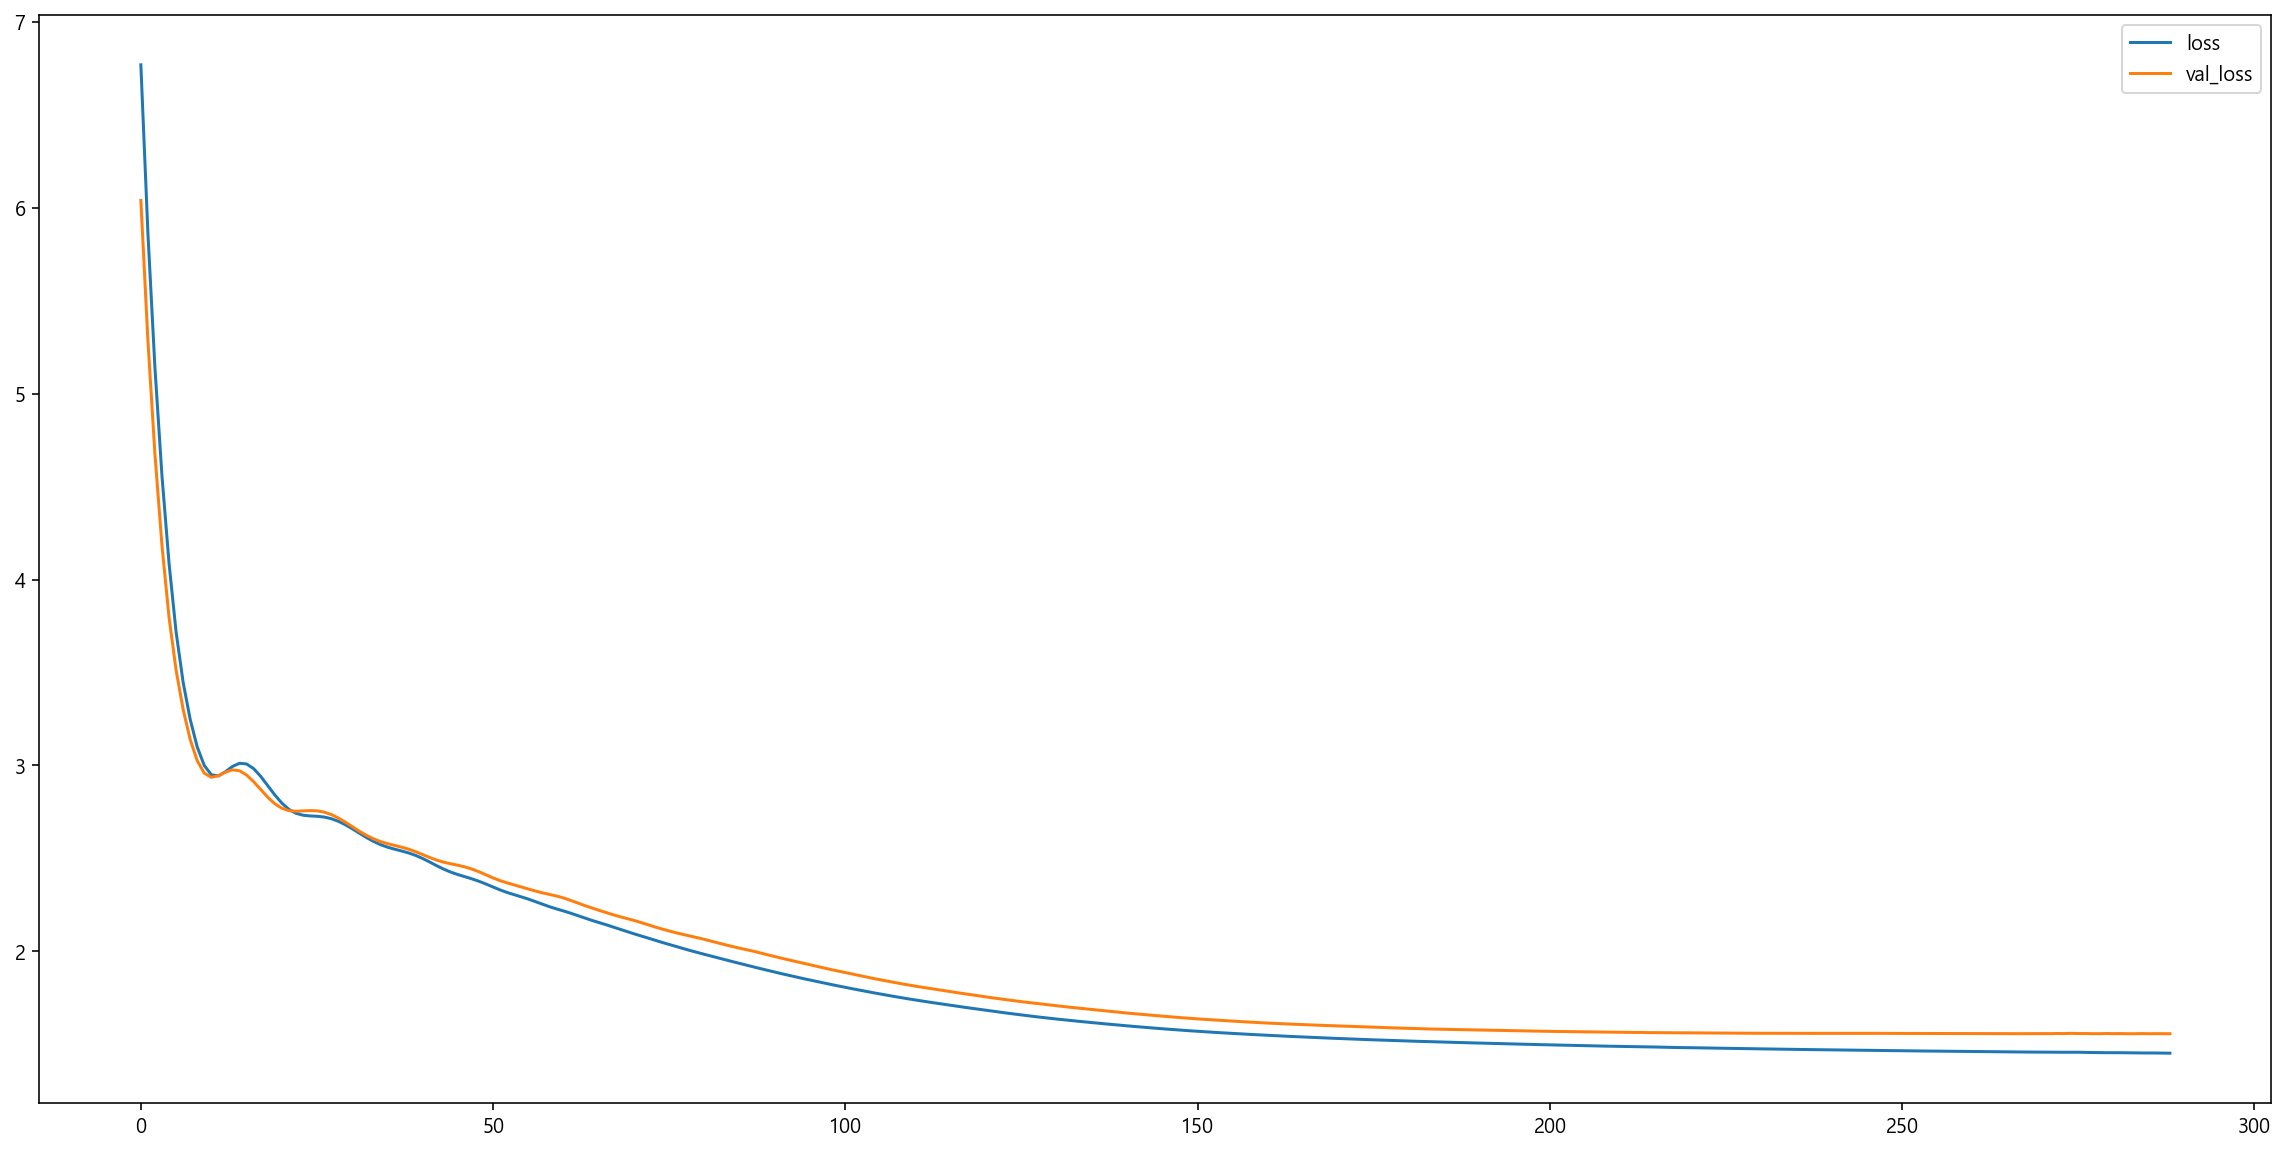

In [20]:
# 손실율 그래프
plt.figure(figsize=(20,10))
plt.plot(loss_list[:-300], label='loss')
plt.plot(val_loss_list[:-300], label = 'val_loss')
plt.legend()
plt.show()

In [21]:
# 모델을 가져온다.
best_model = load_model(path + '/best_model.h5')
best_model

In [23]:
a1 = best_model.evaluate(X_test, y_test)
print(f'손실률 : {a1}')

51/51 [==============================] - 0s 2ms/step - loss: 1.5822
손실률 : 1.582162857055664
